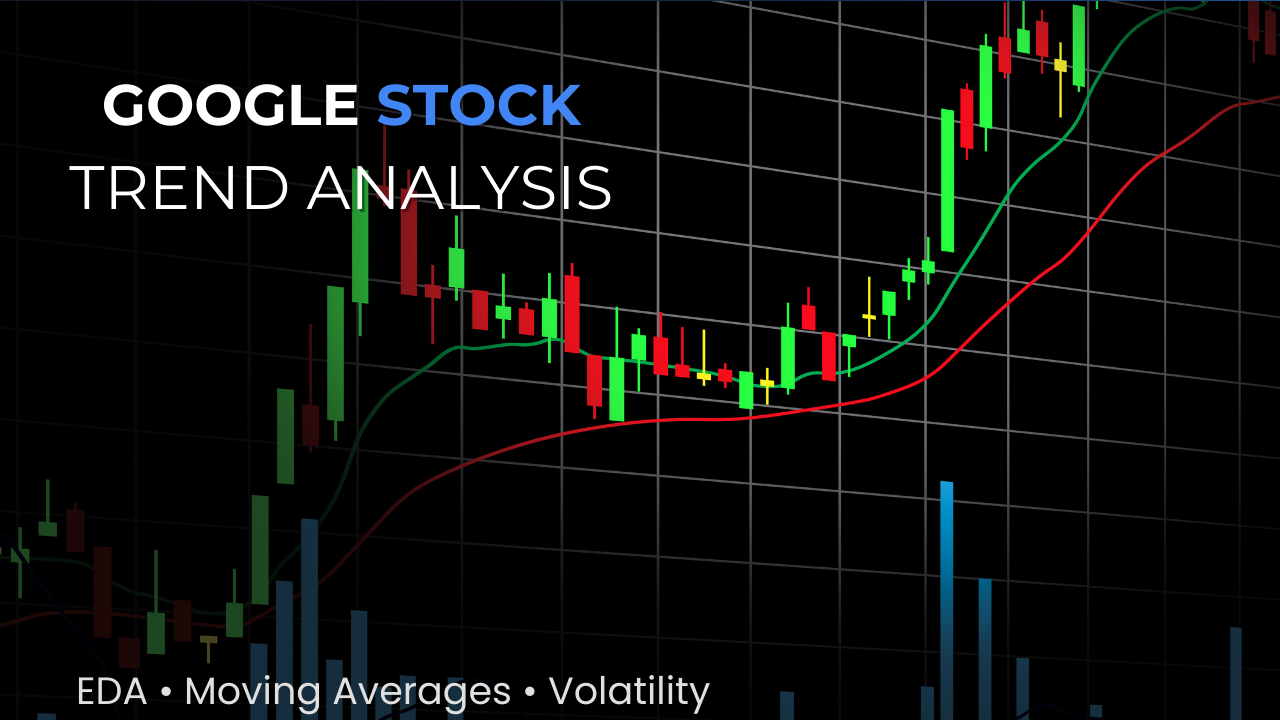

# 📈 GOOGL Stock Trends & Moving Average Analysis

---

## 📌 Introduction  

In this notebook, we analyze historical Google (GOOGL) stock data to understand price trends, volatility, and overall market behavior over time.

Using exploratory data analysis (EDA) and moving averages, we aim to identify patterns and extract meaningful insights from the dataset.

---

## 🎯 Objectives  

- Analyze historical price movements  
- Visualize long-term stock trends  
- Calculate and interpret moving averages  
- Study correlations between stock features  
- Derive key insights from data  

---

## 📂 Dataset Overview  

The dataset contains historical stock market data including:

- **Date** – Trading date  
- **Open** – Opening price  
- **High** – Highest price of the day  
- **Low** – Lowest price of the day  
- **Close** – Closing price  
- **Volume** – Total shares traded  

This data helps in understanding daily stock behavior and trend patterns.

---

## 🛠️ Tools & Libraries Used  

- **Pandas** – Data manipulation  
- **NumPy** – Numerical computations  
- **Matplotlib** – Data visualization  
- **Seaborn** – Statistical visualization  

---

## 🔎 Data Cleaning  

Before analysis, we:

- Checked for missing values  
- Converted the `Date` column to datetime format  
- Sorted the dataset chronologically  
- Verified data consistency  

Clean data ensures accurate and reliable analysis.

---

## 📊 Exploratory Data Analysis (EDA)

### 📈 Closing Price Trend  

We analyze how Google's stock closing price has evolved over time to identify long-term growth and fluctuations.

> 🔍 **Observation:** The stock shows steady long-term growth with noticeable volatility during certain market periods.

---

### 📉 Moving Average Analysis  

Moving averages smooth short-term fluctuations and highlight overall trends.

- **50-Day Moving Average** → Short-term trend indicator  
- (Optional) **200-Day Moving Average** → Long-term trend indicator  

> 🔍 **Observation:** When the closing price moves above the moving average, it may indicate a bullish trend. When it falls below, it may indicate bearish sentiment.

---

### 🔥 Correlation Analysis  

We examine relationships between numerical features using a correlation heatmap.

> 🔍 **Observation:** Strong correlation exists between Open, High, Low, and Close prices, which is expected in stock market data.

---

## 📌 Key Insights  

- Google stock demonstrates long-term upward growth.  
- Moving averages help identify overall trend direction.  
- Price-related features are highly correlated.  
- Market fluctuations are visible during volatile periods.

---

## ✅ Conclusion  

This exploratory analysis provides a foundational understanding of Google’s stock performance.

While EDA reveals historical patterns, stock predictions require advanced time-series modeling or machine learning techniques.

### 🚀 Future Improvements  

- Add RSI and MACD technical indicators  
- Perform time-series forecasting  
- Build predictive machine learning models  

---

## 🙌 Feedback  

If you found this notebook helpful, please consider upvoting 👍  
Feedback and suggestions are always welcome!

In [1]:
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/google-googl-stock-historical-data/GOOGL_stock_data.csv


In [2]:
import os
import pandas as pd

# Get first CSV file automatically
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        if filename.endswith(".csv"):
            file_path = os.path.join(dirname, filename)
            print("Loading:", file_path)
            df = pd.read_csv(file_path)
            break

print("Dataset Loaded Successfully ✅")
print("Shape:", df.shape)
df.head()


Loading: /kaggle/input/google-googl-stock-historical-data/GOOGL_stock_data.csv
Dataset Loaded Successfully ✅
Shape: (5397, 12)


,Date,Open,High,Low,Close,Volume,Daily_Return_Pct,Price_Range,Year,Month,Quarter,Day_of_Week
0,2004-08-19,2.4922,2.5846,2.3834,2.4837,893181924,-0.3411,0.2012,2004,8,3,Thursday
1,2004-08-20,2.6901,2.7093,2.4962,2.5088,456686856,-6.7395,0.2131,2004,8,3,Friday
2,2004-08-23,2.7172,2.8185,2.7085,2.7507,365122512,1.2329,0.1100,2004,8,3,Monday
3,2004-08-24,2.6047,2.7718,2.5724,2.7629,304946748,6.0736,0.1994,2004,8,3,Tuesday
4,2004-08-25,2.6328,2.6824,2.5801,2.6069,183772044,-0.9837,0.1023,2004,8,3,Wednesday


In [3]:
### 🔍 Checking Missing Values
#We check for null values to understand if data cleaning is required.
df.isnull().sum()


Date                0
Open                0
High                0
Low                 0
Close               0
Volume              0
Daily_Return_Pct    0
Price_Range         0
Year                0
Month               0
Quarter             0
Day_of_Week         0
dtype: int64

**A) Stock Closing Price Trend**

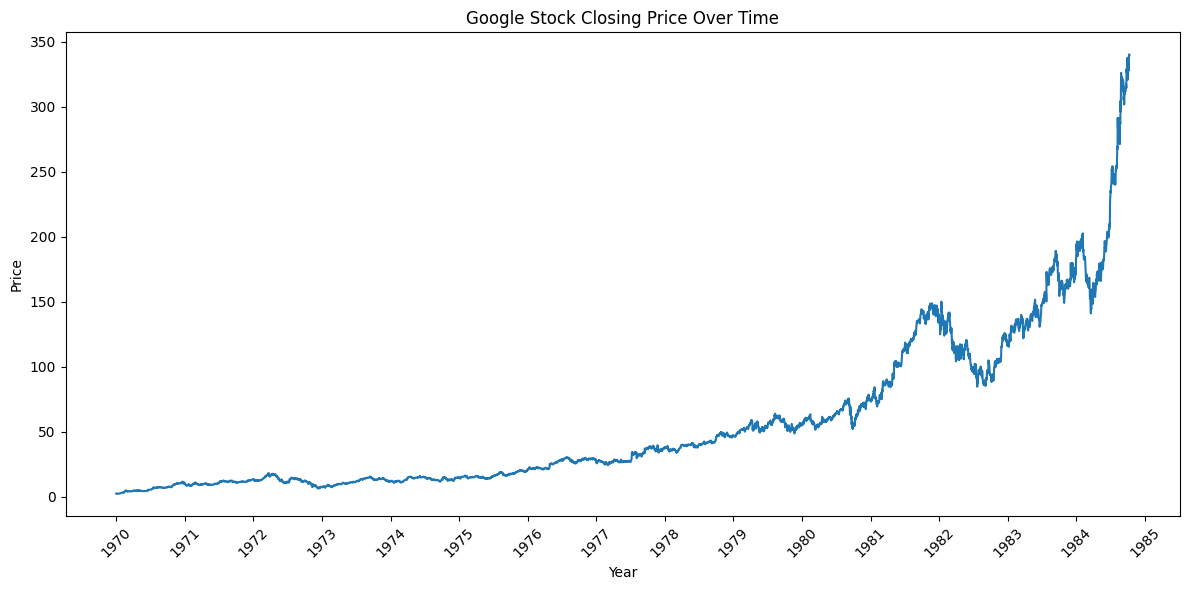

In [4]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(12,6))

plt.plot(df['Date'], df['Close'])

plt.title("Google Stock Closing Price Over Time")
plt.xlabel("Year")
plt.ylabel("Price")

plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

**Observation: The stock shows long-term growth with periods of volatility.**

**B) Add Moving Average**

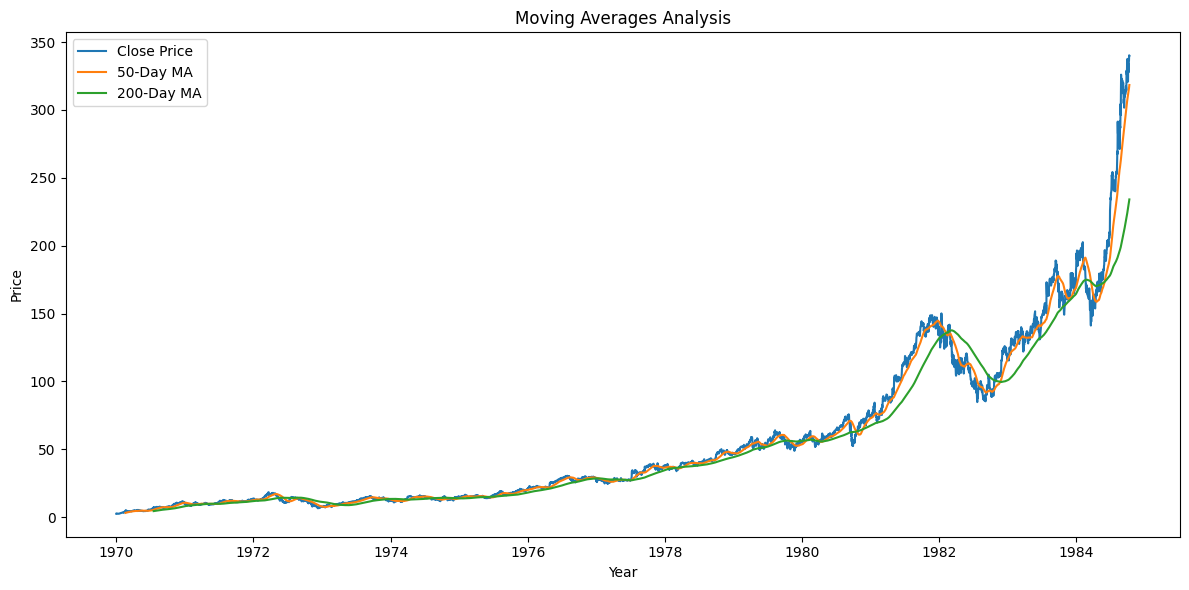

In [5]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

df['MA50'] = df['Close'].rolling(50).mean()
df['MA200'] = df['Close'].rolling(200).mean()

plt.figure(figsize=(12,6))

plt.plot(df['Date'], df['Close'], label="Close Price")
plt.plot(df['Date'], df['MA50'], label="50-Day MA")
plt.plot(df['Date'], df['MA200'], label="200-Day MA")

plt.legend()
plt.title("Moving Averages Analysis")
plt.xlabel("Year")
plt.ylabel("Price")


plt.gca().xaxis.set_major_locator(mdates.YearLocator(2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.tight_layout()
plt.show()

**C) Add Correlation Heatmap**

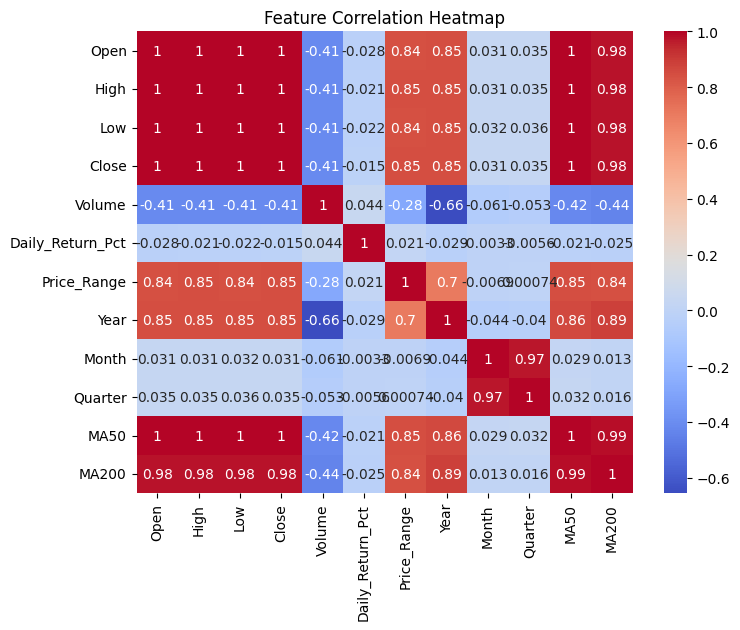

In [6]:
import seaborn as sns
plt.figure(figsize=(8,6))

sns.heatmap(df.corr(numeric_only=True), 
            annot=True, 
            cmap='coolwarm')

plt.title("Feature Correlation Heatmap")
plt.show()



**D)Volume Trend**

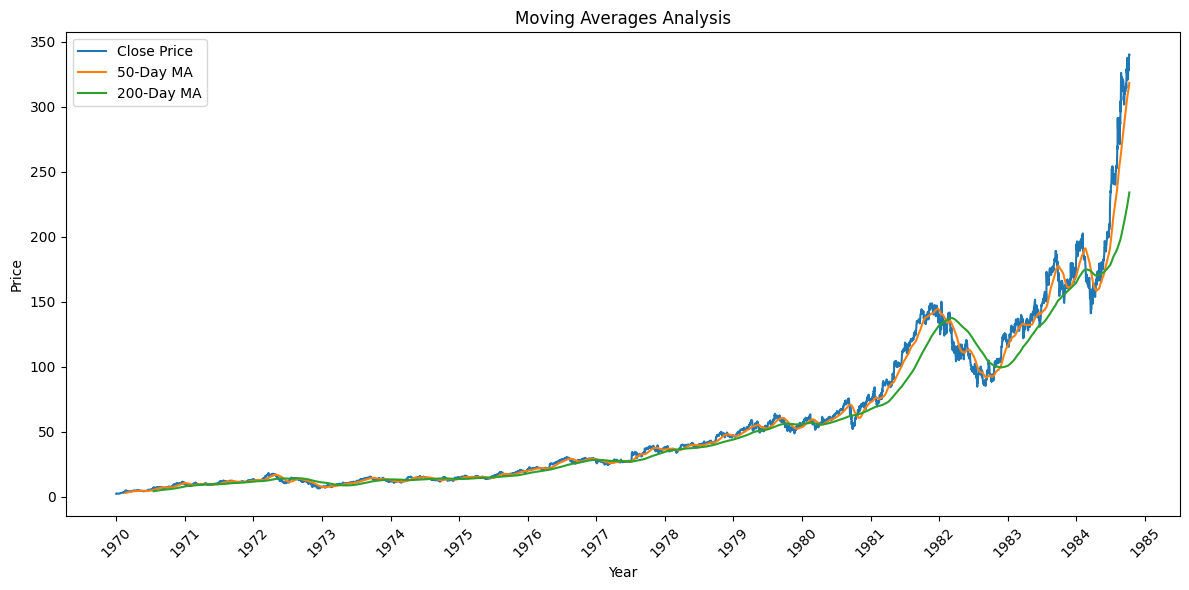

In [7]:
import matplotlib.dates as mdates

plt.figure(figsize=(12,6))

plt.plot(df['Date'], df['Close'], label="Close Price")
plt.plot(df['Date'], df['MA50'], label="50-Day MA")
plt.plot(df['Date'], df['MA200'], label="200-Day MA")

plt.legend()
plt.title("Moving Averages Analysis")
plt.xlabel("Year")
plt.ylabel("Price")

plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**E) Daily Returns**

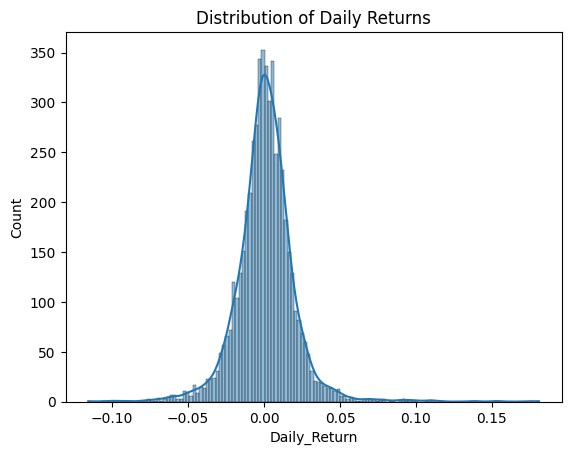

In [8]:
df["Daily_Return"] = df["Close"].pct_change()

plt.figure()
sns.histplot(df["Daily_Return"].dropna(), kde=True)
plt.title("Distribution of Daily Returns")
plt.show()
